# KNN AND MKNN

In [1]:
# import preprocessing
from sklearn.model_selection import train_test_split

# import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# import seaborn
import seaborn as sns

# import MinMaxNormalization
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# import numpy and pandas
import numpy as np
import pandas as pd

# import display
from IPython.display import display

# Pre Data Just 20 Data Train And 4 Data Test

# Import Data

In [2]:
pre_data_train = pd.read_csv('data_train.csv', index_col='No')
pre_data_test = pd.read_csv('data_test.csv', index_col='No')

# reset index
pre_data_train.reset_index(drop=True, inplace=True)
pre_data_test.reset_index(drop=True, inplace=True)

display(pre_data_train)
display(pre_data_test)

,Hotel,LT,ADY,ADM,ADWM,ADOM,SIWN,SIW2N,Adults,Childern,...,BC,DT,Agent,Company,DIWL,CT,ADR,RCPS,TOSR,RS
0,1,71,2016,9,37,10,2,2,3,0,...,0,No Deposit,9.0,NaN,0,Transient,168.30,0,2,Canceled
1,2,96,2017,2,11,12,4,7,2,0,...,0,No Deposit,NaN,NaN,0,Transient-Party,8.00,0,0,Canceled
2,1,34,2015,12,50,8,0,2,1,0,...,0,Non Refund,19.0,NaN,0,Transient,90.00,0,0,Canceled
3,1,418,2016,9,40,26,1,2,2,0,...,0,No Deposit,21.0,NaN,223,Transient-Party,75.00,0,0,Canceled
4,2,100,2017,4,17,29,2,1,2,0,...,0,No Deposit,385.0,NaN,0,Transient-Party,85.00,0,0,Canceled
5,2,115,2016,11,47,17,1,3,2,0,...,0,No Deposit,NaN,NaN,0,Transient-Party,34.00,0,0,Canceled
6,1,239,2017,8,34,25,0,1,2,2,...,0,No Deposit,9.0,NaN,0,Transient,189.00,0,1,Canceled
7,1,180,2017,7,27,6,0,3,2,0,...,0,No Deposit,9.0,NaN,0,Transient,89.10,0,0,Canceled
8,2,42,2015,8,35,28,1,2,2,2,...,1,No Deposit,240.0,NaN,0,Transient,195.00,0,2,Canceled
9,2,19,2015,10,43,21,0,2,1,0,...,0,No Deposit,208.0,NaN,0,Transient-Party,60.00,0,0,Canceled


,Hotel,LT,ADM,ADWM,RS
0,2,36,12,51,Check-Out
1,2,59,11,46,Check-Out
2,1,115,8,33,Canceled
3,2,98,3,12,Canceled


# Columns That Used In This Dataset

In [3]:
columns = ['Hotel', 'LT', 'ADM', 'ADWM', 'RS']
pre_x_train = pre_data_train[columns[:-1]]
pre_y_train = pre_data_train[columns[-1:]]

pre_x_test = pre_data_test[columns[:-1]]
pre_y_test = pre_data_test[columns[-1:]]

# print shape
print(pre_x_train.shape, pre_y_train.shape)
print(pre_x_test.shape, pre_y_test.shape)

(20, 4) (20, 1)
(4, 4) (4, 1)


# Display Each Data

In [4]:
display(
  pre_x_train.head(),
  pre_y_train.head(),
  pre_x_test.head(),
  pre_y_test.head()
)

,Hotel,LT,ADM,ADWM
0,1,71,9,37
1,2,96,2,11
2,1,34,12,50
3,1,418,9,40
4,2,100,4,17


,RS
0,Canceled
1,Canceled
2,Canceled
3,Canceled
4,Canceled


,Hotel,LT,ADM,ADWM
0,2,36,12,51
1,2,59,11,46
2,1,115,8,33
3,2,98,3,12


,RS
0,Check-Out
1,Check-Out
2,Canceled
3,Canceled


# Describe Each Data

In [5]:
display(
  pre_x_train.describe(),
  pre_y_train.describe(),
  pre_x_test.describe(),
  pre_y_test.describe()
)

,Hotel,LT,ADM,ADWM
count,20.000000,20.000000,20.000000,20.000000
mean,1.500000,107.550000,7.050000,30.100000
std,0.512989,100.834139,2.762055,11.702002
min,1.000000,1.000000,2.000000,11.000000
25%,1.000000,32.000000,5.000000,20.750000
50%,1.500000,97.500000,7.000000,29.500000
75%,2.000000,128.000000,9.000000,40.000000
max,2.000000,418.000000,12.000000,50.000000


,RS
count,20
unique,2
top,Canceled
freq,10


,Hotel,LT,ADM,ADWM
count,4.00,4.000000,4.000000,4.000000
mean,1.75,77.000000,8.500000,35.500000
std,0.50,36.009258,4.041452,17.406895
min,1.00,36.000000,3.000000,12.000000
25%,1.75,53.250000,6.750000,27.750000
50%,2.00,78.500000,9.500000,39.500000
75%,2.00,102.250000,11.250000,47.250000
max,2.00,115.000000,12.000000,51.000000


,RS
count,4
unique,2
top,Check-Out
freq,2


# Convert to float

In [6]:
# convert to float
pre_x_train = pre_x_train.astype(float)
pre_x_test = pre_x_test.astype(float)

# Turn Test Canceled to 0 and 1 for Checkout

In [7]:
# Turn Test Canceled to 0 and 1 for Checkout
pre_y_train = pre_y_train.replace('Canceled', 0)
pre_y_train = pre_y_train.replace('Check-Out', 1)
pre_y_test = pre_y_test.replace('Canceled', 0)
pre_y_test = pre_y_test.replace('Check-Out', 1)

In [8]:
display(
  pre_y_train.describe(),
  pre_y_test.describe()
)

,RS
count,20.000000
mean,0.500000
std,0.512989
min,0.000000
25%,0.000000
50%,0.500000
75%,1.000000
max,1.000000


,RS
count,4.00000
mean,0.50000
std,0.57735
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


# Normalize Data

In [9]:
# normalize x_train & y_train
scaler = MinMaxScaler()
# scaler = StandardScaler()
pre_x_train_normalized = scaler.fit_transform(pre_x_train)
pre_x_test_normalized = scaler.fit_transform(pre_x_test)

In [10]:
# describe again
display(
  pd.DataFrame(pre_x_train_normalized).describe(),
  pd.DataFrame(pre_x_test_normalized).describe()
)

,0,1,2,3
count,20.000000,20.000000,20.000000,20.000000
mean,0.500000,0.255516,0.505000,0.489744
std,0.512989,0.241808,0.276205,0.300051
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.074341,0.300000,0.250000
50%,0.500000,0.231415,0.500000,0.474359
75%,1.000000,0.304556,0.700000,0.743590
max,1.000000,1.000000,1.000000,1.000000


,0,1,2,3
count,4.00,4.000000,4.000000,4.000000
mean,0.75,0.518987,0.611111,0.602564
std,0.50,0.455813,0.449050,0.446331
min,0.00,0.000000,0.000000,0.000000
25%,0.75,0.218354,0.416667,0.403846
50%,1.00,0.537975,0.722222,0.705128
75%,1.00,0.838608,0.916667,0.903846
max,1.00,1.000000,1.000000,1.000000


# Pairplot Data Train X and Data Train Y

/home/ubaid/anaconda3/envs/kerasenv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/ubaid/anaconda3/envs/kerasenv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/ubaid/anaconda3/envs/kerasenv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/ubaid/anaconda3/envs/kerasenv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprec

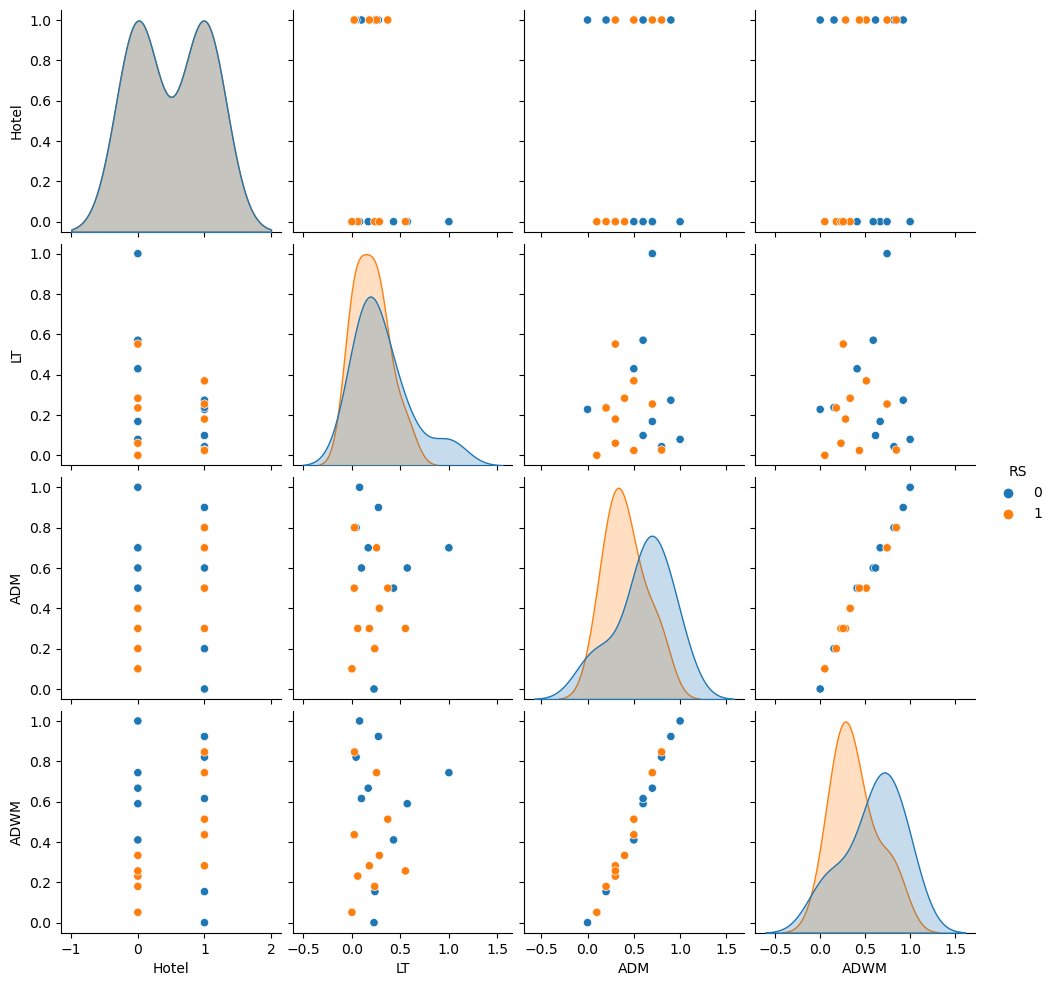

In [11]:
# reset index
pre_y_train = pre_y_train.reset_index(drop=True)
pre_y_test = pre_y_test.reset_index(drop=True)

# concat data train x and y
pre_data_train = pd.concat([pd.DataFrame(pre_x_train_normalized), pre_y_train], axis=1)

# set columns
pre_data_train.columns = columns

# Pairplot Data Train X and Data Train Y and save
sns_pairplot = sns.pairplot(pre_data_train, hue='RS')
sns_pairplot.savefig('result/pre_pairplot.png')

In [12]:
# distance
def euclidean_distance(x1, x2):
  return np.sqrt(np.sum((x1 - x2) ** 2))

In [13]:
pre_x_test

,Hotel,LT,ADM,ADWM
0,2.0,36.0,12.0,51.0
1,2.0,59.0,11.0,46.0
2,1.0,115.0,8.0,33.0
3,2.0,98.0,3.0,12.0


# KNN

In [14]:
class KNN:
  def __init__(self, k=3):
    self.k = k

  def fit(self, X, y):
    self.X_train = X
    self.y_train = y

  def predict(self, X):
    y_pred = [self._predict(x) for x in X]
    return np.array(y_pred)

  def _predict(self, x):
    # Compute distances between x and all examples in the training set
    distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
    # Sort by distance and return indices of the first k neighbors
    k_indices = np.argsort(distances)[:self.k]
    # Extract the labels of the k nearest neighbor training samples
    k_nearest_labels = [self.y_train[i] for i in k_indices]
    # Return the most common class label
    most_common = np.bincount(k_nearest_labels).argmax()
    return most_common


# Test With K = 3

In [15]:
# k = 3
k = 3

# define knn
knn = KNN(k=k)
# fit knn
knn.fit(pre_x_train_normalized, pre_y_train.values.flatten())
# predict knn
y_pred = knn.predict(pre_x_test_normalized)
# calculate accuracy
accuracy = np.sum(y_pred == pre_y_test.values.flatten()) / len(pre_y_test)
# print accuracy
print(accuracy)

0.5


# Test With K start from 1 until length of data train minus 1

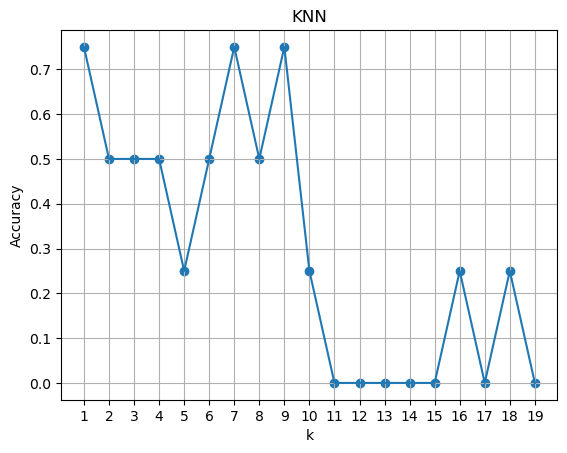

In [16]:
# define K from 1 until length of data train
k = range(1, len(pre_x_train_normalized))

# calculate KNN
accuracies = []
for i in k:
  knn = KNN(k=i)
  knn.fit(pre_x_train_normalized, pre_y_train.values.flatten())
  y_pred = knn.predict(pre_x_test_normalized)
  # save prediction to csv
  pd.DataFrame(y_pred).to_csv(f'result/knn_k{i}.csv')
  accuracy = np.sum(y_pred == pre_y_test.values.flatten()) / len(pre_y_test)
  accuracies.append(accuracy)

# plot KNN
plt.plot(k, accuracies)
# plot with dot
plt.scatter(k, accuracies)
# don't change k as float
plt.xticks(range(1, len(pre_x_train_normalized)))
# with grid
plt.grid()
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('KNN')
plt.savefig('result/knn.png')
plt.show()

# MKNN

In [17]:
# MKNN
# Tahapan analisis yang digunakan pada penelitian ini yakni sebagai berikut:
# 1.Melakukan analisis statistika deskriptif.
# 2.Melakukan standarisasi data pada semua variabel.
# 3.Melakukan pengacakan data.
# 4.Melakukan pembagian data training dan data testing berdasarkan proporsi.
# 5.Penentuan nilai k-fold cross validation.
# 6.Penentuan jumlah data dalam subset.
# 7.Menghitung jarak Euclid antar data training dan data testing.
# 8.Melakukan klasifikasi berdasarkan tertangga terdekat.
# 9.Memilih nilai K optimal berdasarkan proporsi.
# 10. Menghitung jarak Euclid antar data training.
# 11. Menghitung validitas pada data training.
# 12. Menghitung weight voting.
# 13. Menghitung akurasi ketepatan prediksi.
# buat class MKNN berdasarkan comment di atas

class MKNN:
  def __init__(self, k:int=3):
    self.k = k

  def fit(self, X_train:np.ndarray, y_train:np.ndarray):
    self.X_train = X_train
    self.y_train = y_train

  def predict(self, X_test:np.ndarray):
    y_pred = [self._predict(x, i) for i, x in enumerate(X_test)]
    return np.array(y_pred)

  def _predict(self, x_test:np.ndarray, idx:int):
    # Compute distances between x with training set
    distances = [euclidean_distance(x_test, x_train) for x_train in self.X_train]
    # extract with label and save to csv file with suffix index
    pd.DataFrame(distances).to_csv(f'result/mknn_k{self.k}_distances_{idx}.csv')
    
    # calculate validities
    validities = []
    for idx_of_distance, distance in enumerate(distances):
      diff = np.abs(distances - distance)

      indices = list(range(self.y_train.size))
      indices.remove(idx_of_distance)
      indices.sort(key=lambda x: diff[x])
      indices_sorted_k = indices[:self.k]
      validities.append(self._validity(idx_of_distance, indices_sorted_k))

    # extract with label and save to csv file with suffix index
    pd.DataFrame(validities).to_csv(f'result/mknn_k{self.k}_validities_{idx}.csv')
    

    # calculate weighted voting
    weighted_voting = []
    for idx_of_validity, validity in enumerate(validities):
      weighted_voting.append(validity/(distances[idx_of_validity] + 0.5))

    # extract with label and save to csv file with suffix index
    pd.DataFrame(weighted_voting).to_csv(f'result/mknn_k{self.k}_weighted_voting_{idx}.csv')

    # sort weighted voting
    indices = list(range(self.y_train.size))
    indices.sort(key=lambda x: weighted_voting[x], reverse=True)
    indices_sorted_k = indices[:self.k]
    # extract with label and save to csv file with suffix index
    pd.DataFrame(indices).to_csv(f'result/mknn_k{self.k}_indices_sorted_{idx}.csv')
    pd.DataFrame(indices_sorted_k).to_csv(f'result/mknn_k{self.k}_indices_sorted_k_{idx}.csv')

    # Extract the labels of the k nearest neighbor training samples
    k_nearest_labels = [self.y_train[i] for i in indices_sorted_k]
    # save to csv
    pd.DataFrame(k_nearest_labels).to_csv(f'result/mknn_k{self.k}_k_nearest_labels_{idx}.csv')

    # Return the most common class label
    most_common = np.bincount(k_nearest_labels).argmax()
    # save to csv
    pd.DataFrame([most_common]).to_csv(f'result/mknn_k{self.k}_most_common_{idx}.csv')

    return most_common
    
    # return distances

  def _validity(self, idx:int, indices_sorted_k):
    return np.sum(self.y_train[indices_sorted_k] == self.y_train[idx]) / self.k

In [22]:
pre_y_train.values.reshape(-1)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [24]:
mknn = MKNN()
mknn.fit(pre_x_train_normalized, pre_y_train.values.reshape(-1))
ypred = mknn.predict(pre_x_test_normalized)

[4, 2, 14] [0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1]
[4, 2, 0] [0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1]
[3, 6, 13] [0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1]
[12, 18, 17] [0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1]


In [28]:
# replace extract label, 0 is canceled and 1 is checkout
y_pred = np.where(ypred == 0, 'Canceled', 'Check-Out')

# print
print(y_pred)

['Canceled' 'Canceled' 'Canceled' 'Check-Out']


In [ ]:
test = np.array([1,2,3,2,5])

index = 3

# get difference of test[index] and test
diff = np.abs(test - test[index])
# print('diff', diff)
# get 3 lowest but save index of diff only
indices = list(range(test.size))
# indices

# remove index of indices
indices.remove(index)

# sort diff with affect indices too
indices.sort(key=lambda x: diff[x])

print('indices', indices)
print('diff', diff)
print('test', test)

indices [1, 0, 2, 4]
diff [1 0 1 0 3]
test [1 2 3 2 5]


In [ ]:
pro = np.array(['a', 'b', 'c', 'd'])
